# Import Libraries 

In [24]:
from fa2l import force_atlas2_layout
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
G = nx.read_gexf("seth_rich_overall_web.gexf")

### Extract Weakly Connected Component 

In [4]:
G = max(nx.weakly_connected_component_subgraphs(G), key=len)

### Convert to Undirected Graph

Fa2l currently does not support directed graphs.

In [5]:
G = G.to_undirected()

# Apply the layout 

In [6]:
pos = force_atlas2_layout(
        G,
        iterations=50,
        pos_list=None,
        node_masses=None,
        outbound_attraction_distribution=False,
        lin_log_mode=False,
        prevent_overlapping=False,
        edge_weight_influence=1.0,

        jitter_tolerance=1.0,
        barnes_hut_optimize=True,
        barnes_hut_theta=0.5,

        scaling_ratio=20,
        strong_gravity_mode=False,
        multithread=False,
        gravity=1.0)


# Draw the Graph

In [8]:
nodes = G.nodes()

data_nodes = G.nodes(data=True)

# set color

node_colors = ['#FF0000' if n[1]['partisan_retweet'] == 'right' else '#999999' for n in data_nodes]

# set size field

size_field = 'simple_tweet_count'

# set maximum node size

max_node_size = 3000

# maximum node value? 
max_node_val = max([n[1][size_field] for n in data_nodes])





In [19]:
# edge case : all simple_tweet_counts are 0.

print(max_node_val)

0


In [20]:
sum_node_val = sum([n[1][size_field] for n in data_nodes])


In [21]:
sum_node_val

0

In [22]:
# set node sizes

# node_sizes = [max_node_size * (n[1][size_field] / max_node_val) for n in data_nodes]

# set node labels

node_labels = dict((n[0], n[1]['label']) for n in data_nodes)

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


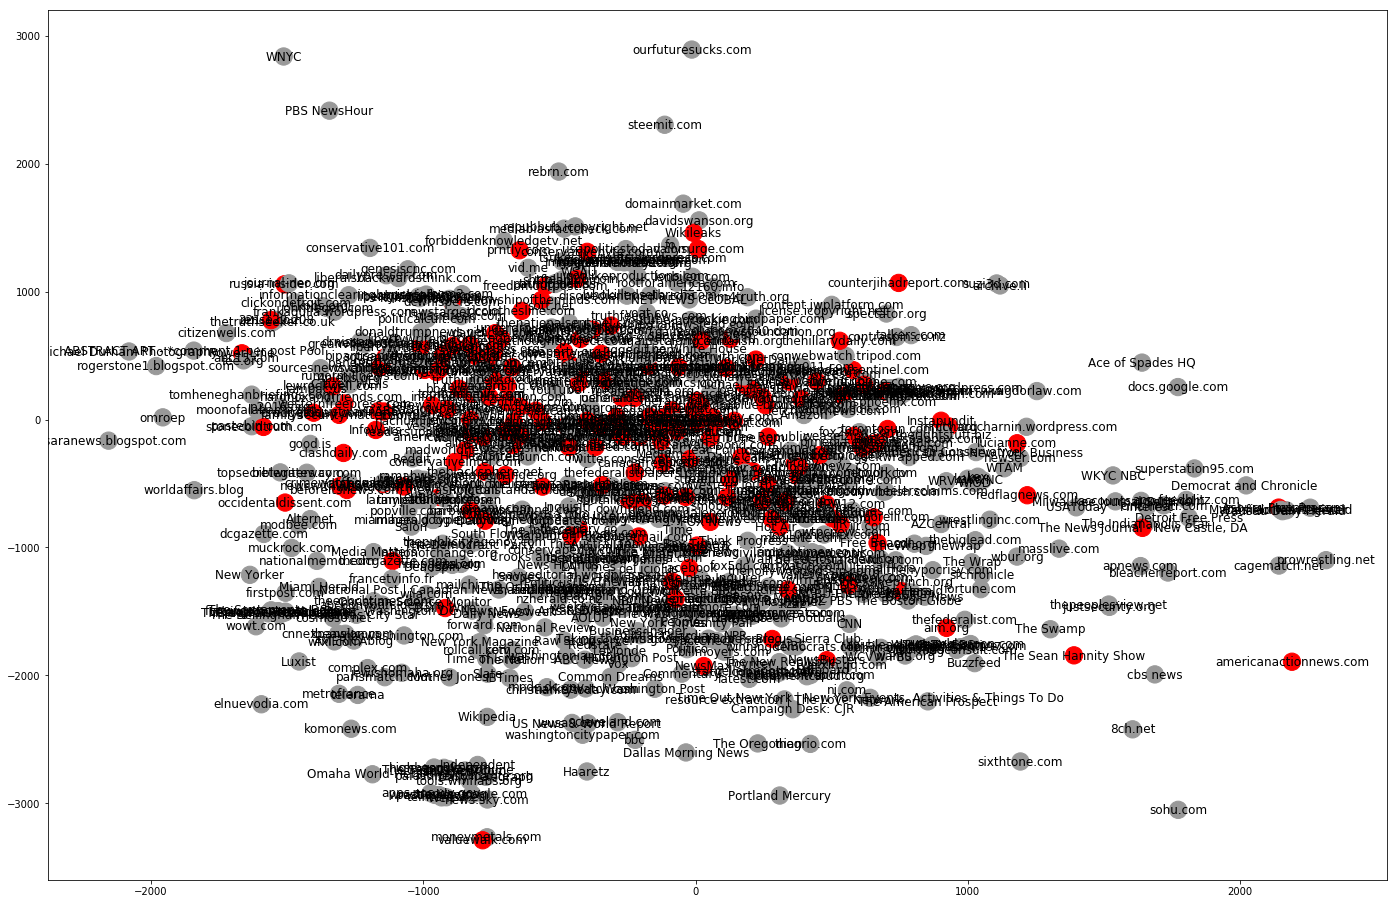

In [53]:
plt.figure(1, figsize=(24, 16))
nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, nodelist=nodes, labels=node_labels);

# Extract The Top 100 Subgraph by Degree Centrality

In [31]:
degree_centrality = nx.degree_centrality(G)

In [38]:
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1],reverse=True)

In [42]:
top_100_central_nodes = sorted_degree_centrality[0:100]

In [46]:
top_100_subgraph_nodes = [n[0] for n in top_100_central_nodes]

In [48]:
top_100_subgraph  = G.subgraph(top_100_subgraph_nodes)

In [50]:
print(nx.info(top_100_subgraph))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1662
Average degree:  33.2400


In [72]:
subgraph_pos = {k:v for k,v in pos.items() if k in top_100_subgraph_nodes}

In [100]:
subgraph_node_size = {k:v*100 for k,v in degree_centrality.items() if k in top_100_subgraph_nodes}

In [51]:
subgraph_nodes = top_100_subgraph.nodes()

In [52]:
subgraph_data_nodes = top_100_subgraph.nodes(data=True)

In [107]:
# set color

subgraph_node_colors = ['#f44295' if n[1]['partisan_retweet'] == 'right' else '#e5f0f9' for n in data_nodes]


In [108]:
# set labels
subgraph_node_labels = dict((n[0], n[1]['label']) for n in subgraph_data_nodes)

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


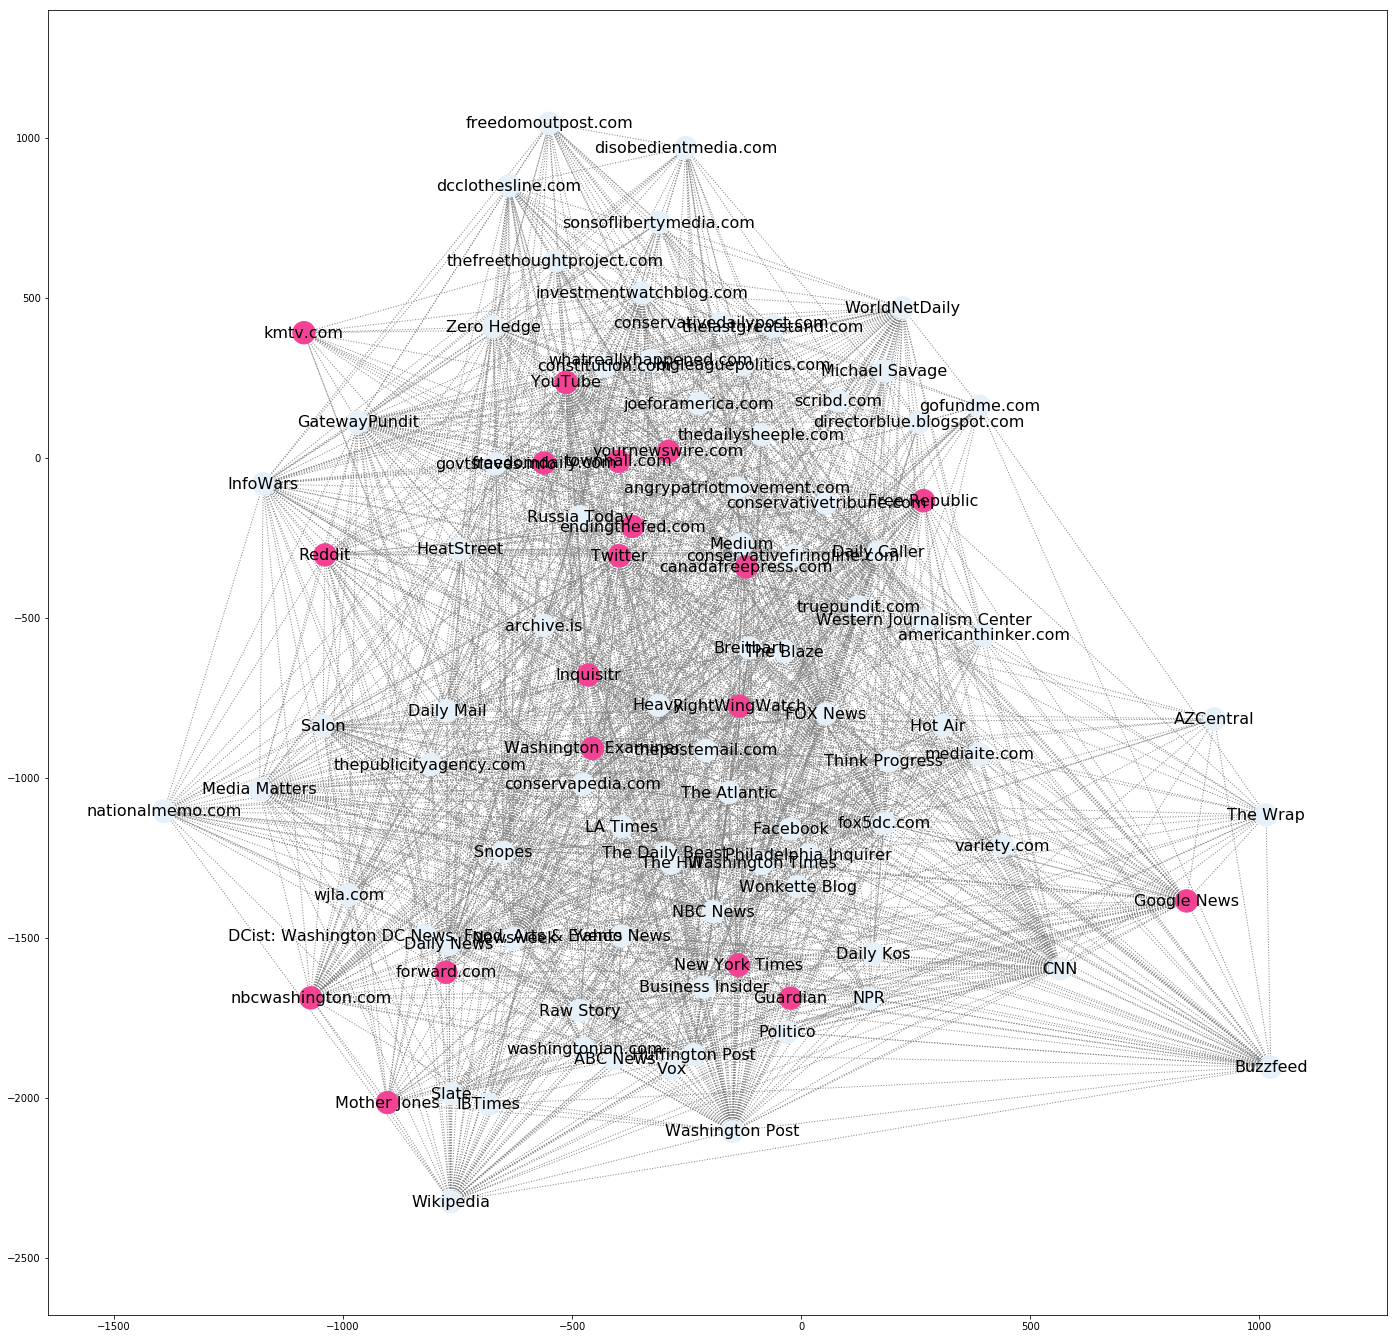

In [109]:
plt.figure(1, figsize=(24, 24))
nx.draw_networkx(top_100_subgraph,
                 pos=subgraph_pos,
                 node_color=subgraph_node_colors, 
                 node_size = 500,
                 edge_color = 'gray',
                 style = 'dotted',
                 labels= subgraph_node_labels,
                 font_size = 16);